In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import sklearn
from sklearn.model_selection import KFold
from matplotlib import rcParams
import joblib
import cartopy.crs as ccrs
from sklearn.metrics import r2_score
import glob
import warnings
warnings.filterwarnings('ignore')

In [3]:
swoosh = netCDF4.Dataset('./data/swoosh/swoosh-v02.7-198401-202202-latpress-10deg-L31.nc')['combinedanomfillh2oq'][:,0,:]
swoosh_lat = netCDF4.Dataset('./data/swoosh/swoosh-v02.7-198401-202202-latpress-10deg-L31.nc')['lat'][:]
i1=6
i2=12
weights=np.cos((swoosh_lat/360.0)*2*np.pi)
weighted_swoosh = swoosh[:,i1:i2]*weights[i1:i2]
swoosh_tropics = np.sum(weighted_swoosh[:,:],axis=1)/np.sum(weights[i1:i2])

In [4]:
model_list = ['ACCESS1-0', 'ACCESS1-3', 'ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'bcc-csm1-1_',
             'bcc-csm1-1-m','BCC-CSM2-MR_', 'BCC-ESM1', 'BNU-ESM', 'CAMS-CSM1-0', 'CanESM2', 'CanESM5',
             'CCSM4', 'CESM2_', 'CESM2-WACCM', 'CNRM-CM5', 'CNRM-CM6-1','CNRM-ESM2-1','CSIRO-Mk3-6-0', 'E3SM-1-0', 'EC-Earth3-Veg', 'EC-EARTH', 'FGOALS-f3-L', 'FGOALS-g2', 'FGOALS-g3', 
             'GFDL-CM3', 'GFDL-CM4', 'GFDL-ESM2G', 'GFDL-ESM2M', 'GFDL-ESM4',
             'GISS-E2-1-G', 'GISS-E2-1-H', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'HadGEM3-GC31-LL',
             'HadGEM3-GC31-MM', 'inmcm4', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'IPSL-CM6A-LR',
             'MIROC5', 'MIROC6', 'MIROC-ES2L', 'MIROC-ESM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MPI-ESM-P', 'MRI-CGCM3',
             'MRI-ESM2-0', 'NESM3', 'NorESM1-M', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'UKESM1-0-LL']

model_list_cmip5 = ['ACCESS1-0', 'ACCESS1-3', 'bcc-csm1-1_', 'bcc-csm1-1-m', 'BNU-ESM', 'CanESM2', 'CCSM4', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'EC-EARTH', 'FGOALS-g2', 'GFDL-CM3', 
               'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'inmcm4', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC5', 'MIROC-ESM', 'MPI-ESM-LR', 'MPI-ESM-MR', 
                    'MPI-ESM-P', 'MRI-CGCM3', 'NorESM1-M']
model_list_cmip5_1968 = ['MPI-ESM-P']
model_list_cmip5_labels = ['ACCESS1-0', 'ACCESS1-3', 'BCC-CSM1-1', 'BCC-CSM1-1-m', 'BNU-ESM', 'CanESM2', 'CCSM4', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'EC-EARTH', 'FGOALS-g2', 
                           'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'INM-CM4', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC5', 'MIROC-ESM', 'MPI-ESM-LR', 'MPI-ESM-MR',
                           'MPI-ESM-P', 'MRI-CGCM3', 'NorESM1-M']
model_list_cmip6 = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR_', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5',
             'CESM2_', 'CESM2-WACCM', 'CNRM-CM6-1','CNRM-ESM2-1', 'E3SM-1-0', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'FGOALS-g3', 
             'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR',
             'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'UKESM1-0-LL']
model_list_cmip6_1977 = ['CESM2_', 'E3SM-1-0', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'FGOALS-g3', 
             'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 
             'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON']
model_list_cmip6_labels = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5',
             'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1','CNRM-ESM2-1', 'E3SM-1-0', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'FGOALS-g3', 
             'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR',
             'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'UKESM1-0-LL']

In [5]:
swoosh_tropics_Will = netCDF4.Dataset('./data/swoosh/SWOOSH_samples_scaleSE_1.0_scaleB_1.0_nsamples_50_aura5_finalNatGeo.nc')['samples'][:,:]
non_nan_indices = np.argwhere(~np.isnan(swoosh_tropics_Will[:,0])).T

In [6]:
swoosh_tropics_Will_mean = np.mean(swoosh_tropics_Will[:,:],axis=1)

In [7]:
swoosh_tropics_Will_mean[non_nan_indices.flatten()].shape

(315,)

In [8]:
swoosh_tropics_Will_mean.shape

(444,)

ACCESS1-0 7000.0
ACCESS1-3 7000.0
bcc-csm1-1_ 7000.0
bcc-csm1-1-m 7000.0
BNU-ESM 7000.0
CanESM2 7000.0
CCSM4 7000.0
CNRM-CM5 7000.0
CSIRO-Mk3-6-0 7000.0
EC-EARTH 7000.0
FGOALS-g2 7000.0
GFDL-CM3 7000.0
GFDL-ESM2G 7000.0
GFDL-ESM2M 7000.0
GISS-E2-H 7000.0
GISS-E2-R 7000.0
HadGEM2-ES 7000.0
inmcm4 7000.0
IPSL-CM5A-MR 7000.0
IPSL-CM5B-LR 7000.0
MIROC5 7000.0
MIROC-ESM 7000.0
MPI-ESM-LR 7000.0
MPI-ESM-MR 7000.0
MPI-ESM-P 7000.0
MRI-CGCM3 7000.0
NorESM1-M 7000.0


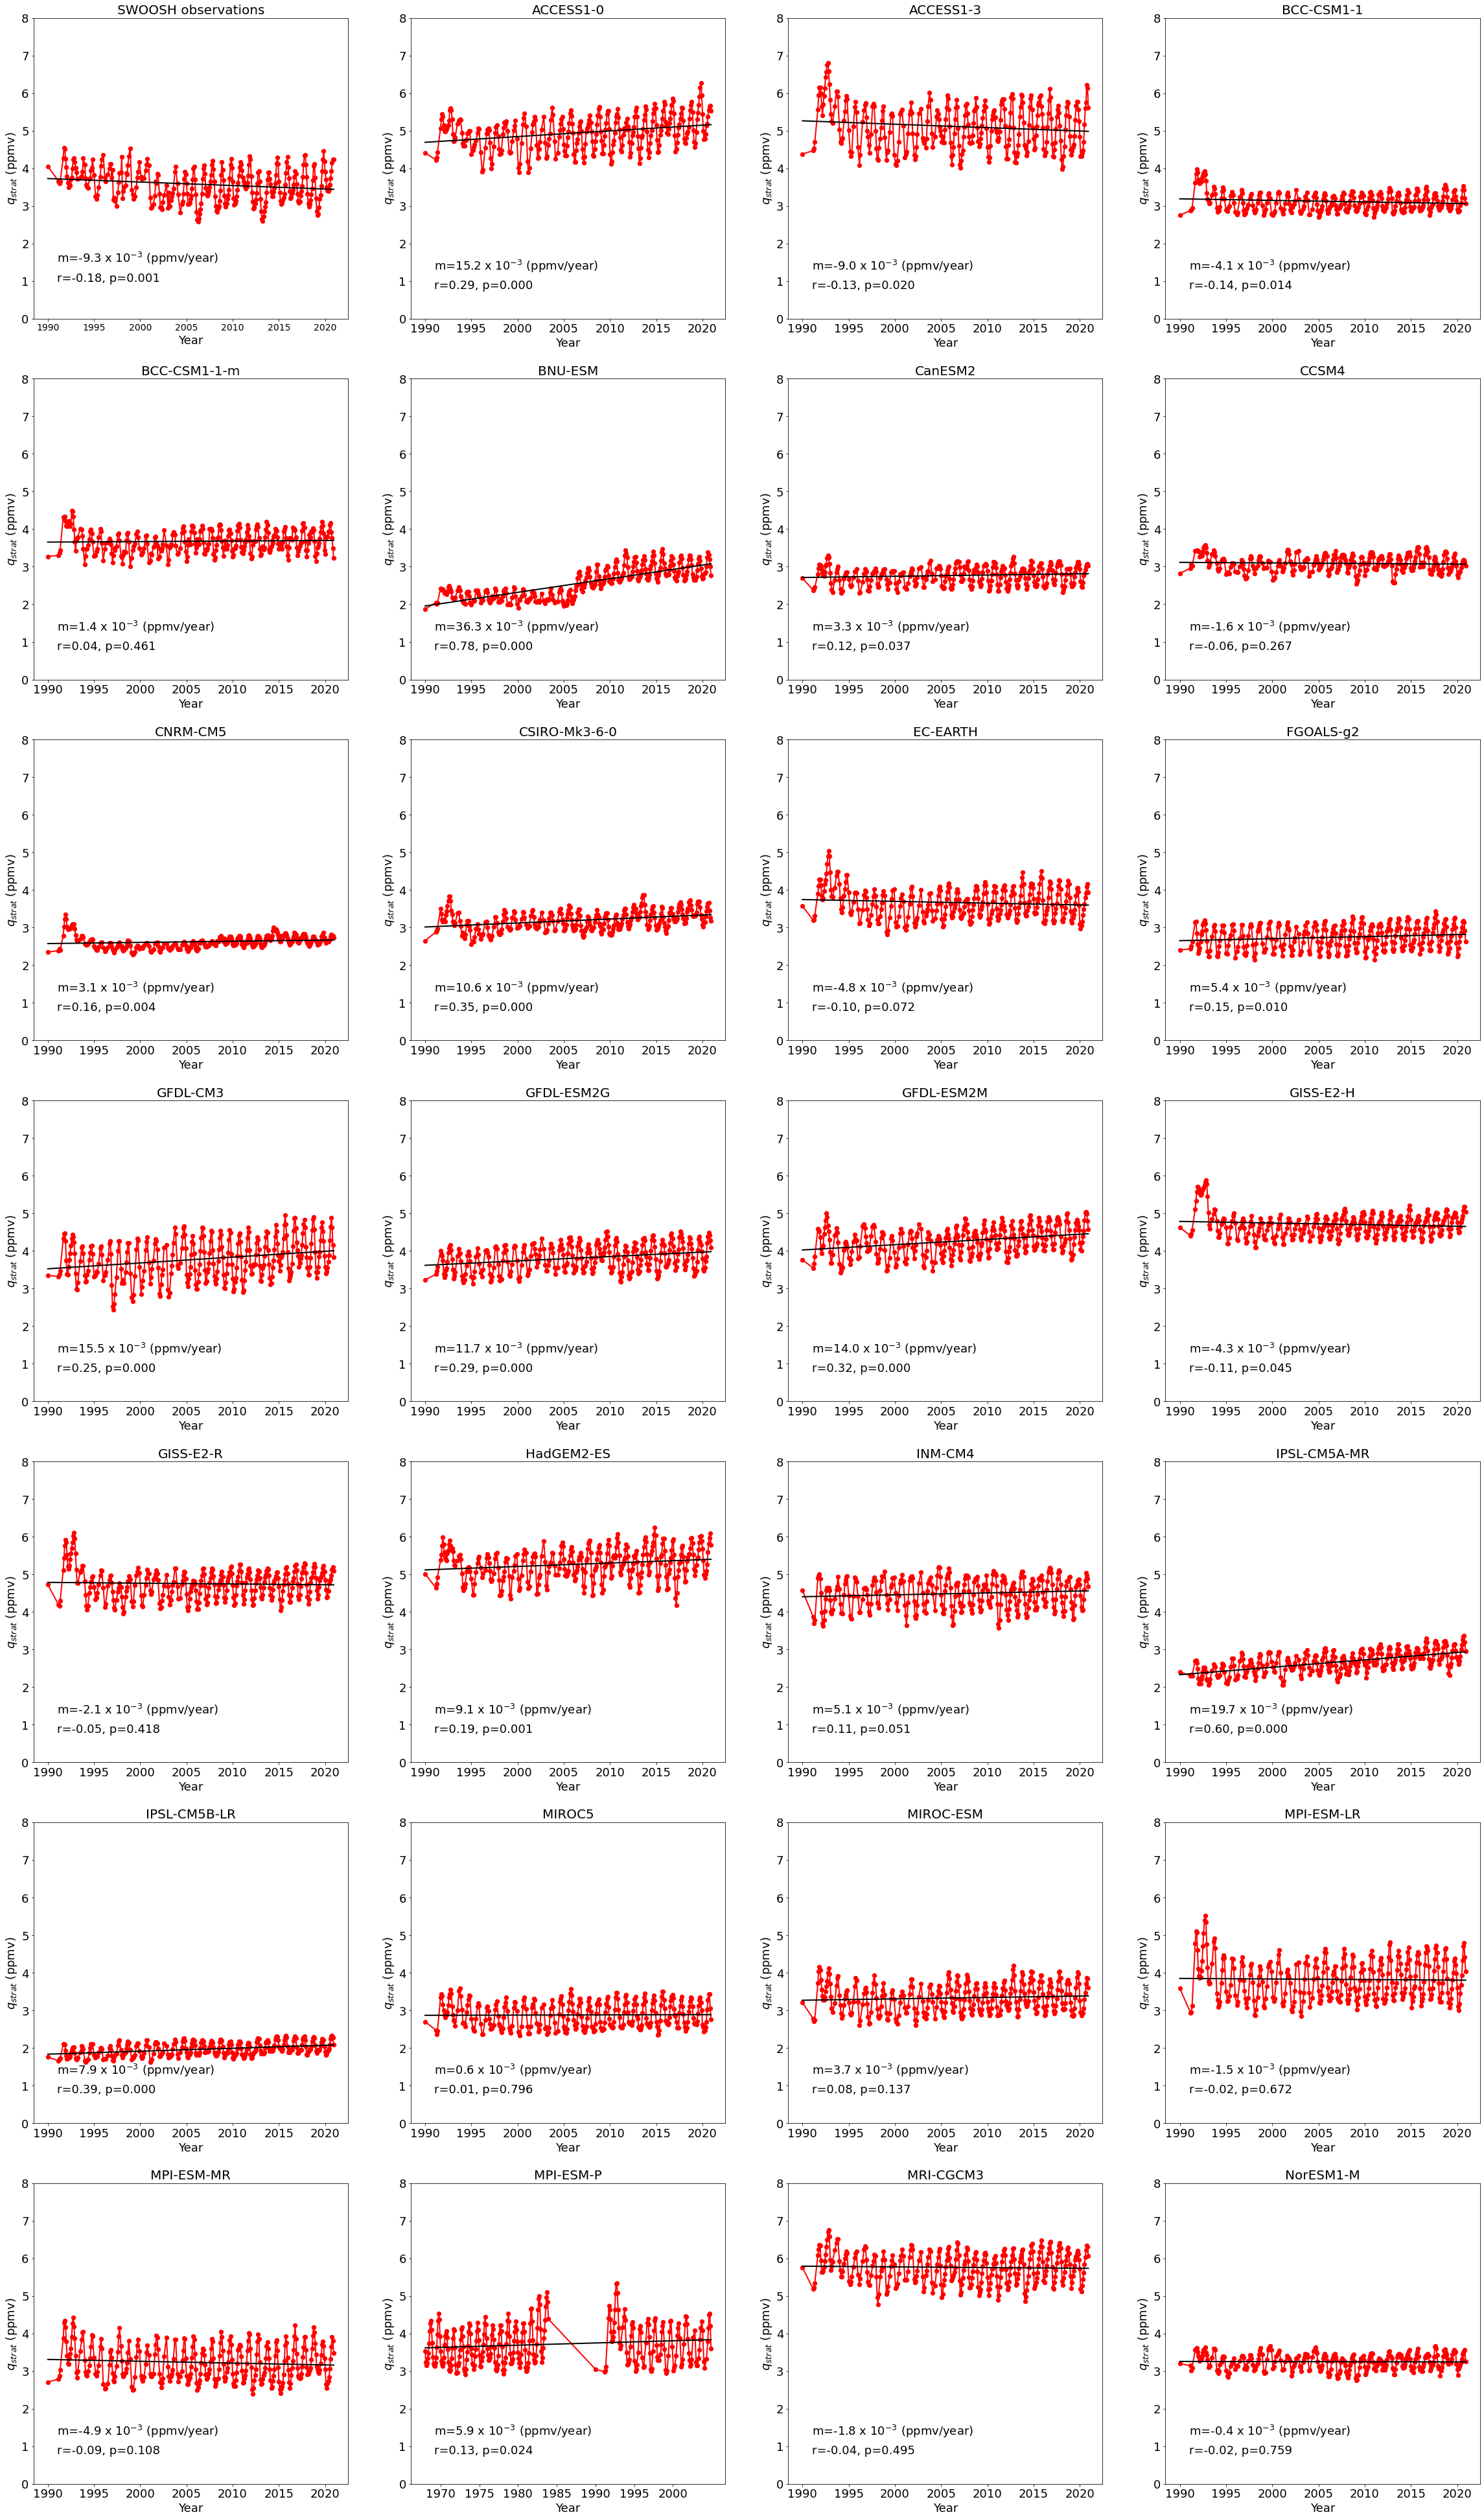

In [9]:
#### first plot CMIP5 models
import matplotlib.patches
matplotlib.rcParams.update({'font.size': 14})
nrows=7
ncols=4
nr_models = len(model_list_cmip5)
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(40,70))
axs=axs.flatten()
nr_samples = len(swoosh_tropics_Will_mean[non_nan_indices.flatten()])
nt_train_end = len(swoosh_tropics_Will_mean)
months = np.array(non_nan_indices.flatten())
reg1 = stats.linregress(months,swoosh_tropics_Will_mean[non_nan_indices.flatten()])

axs[0].plot(months,swoosh_tropics_Will_mean[non_nan_indices.flatten()],color='r',linewidth=2)
axs[0].scatter(months,swoosh_tropics_Will_mean[non_nan_indices.flatten()],color='r',s=40)
axs[0].plot(months,reg1.intercept+reg1.slope*months,color='k',linewidth=2)
axs[0].set_title('SWOOSH observations',size=20)
axs[0].set_xlabel('Year',size=18)
axs[0].set_ylabel('$q_{strat}$ (ppmv)',size=18)
axs[0].text(0.075,0.2,'m='+str("{:.1f}".format(round(reg1.slope*1e3*12,1)))+' x $10^{-3}$ (ppmv/year)',horizontalalignment='left', verticalalignment='center', transform=axs[0].transAxes,size=18)
axs[0].text(0.075,0.135,'r='+str("{:.2f}".format(round(reg1.rvalue,2)))+\
            ', p='+str("{:.3f}".format(round(reg1.pvalue,3))),horizontalalignment='left', verticalalignment='center', transform=axs[0].transAxes,size=18)
axs[0].set_ylim(0,8.0)
axs[0].set_xticks([72,132,192,252,312,372,432])
axs[0].set_xticklabels(['1990','1995','2000','2005','2010','2015','2020'])
axs[0].set_yticks([0,1,2,3,4,5,6,7,8])
axs[0].set_yticklabels(['0','1','2','3','4','5','6','7','8'],size=18)

nr_obs=1
level_selected = 1
for modeli in range(0,nr_models):
    Y_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list_cmip5[modeli]+'*historical*.nc')[0])['hus'][:nt_train_end,level_selected,0,0]*1e6/0.6213
    print(model_list_cmip5[modeli],netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list_cmip5[modeli]+'*historical*.nc')[0])['plev'][level_selected])
    if model_list_cmip5[modeli] in model_list_cmip5_1968:
### first 192 months can be considered fully covered for the model, similar to the last 192 months in SWOOSH. Critical is the masking from 72+192 onwards; covering Pinatubo
        shifted_months = months[:-192]+192
        months_modeli = np.concatenate([np.arange(0,192),shifted_months])
#         print(months_modeli.shape)
    else:
        months_modeli = months
    axs[modeli+nr_obs].plot(months_modeli,Y_raw_hist[months_modeli],color='r',linewidth=2)
    axs[modeli+nr_obs].scatter(months_modeli,Y_raw_hist[months_modeli],color='r',s=40)
    reg = stats.linregress(months_modeli,Y_raw_hist[months_modeli])
    axs[modeli+nr_obs].plot(months_modeli,reg.intercept+reg.slope*months_modeli,color='k',linewidth=2)
    axs[modeli+nr_obs].set_xlabel('Year',size=18)
    axs[modeli+nr_obs].set_ylabel('$q_{strat}$ (ppmv)',size=18)
    axs[modeli+nr_obs].text(0.075,0.175,'m='+str("{:.1f}".format(round(reg.slope*1e3*12,1)))+' x $10^{-3}$ (ppmv/year)',horizontalalignment='left', verticalalignment='center', 
                            transform=axs[modeli+nr_obs].transAxes,size=18)
    axs[modeli+nr_obs].text(0.075,0.11,'r='+str("{:.2f}".format(round(reg.rvalue,2)))+\
            ', p='+str("{:.3f}".format(round(reg.pvalue,3))),horizontalalignment='left', verticalalignment='center', transform=axs[modeli+nr_obs].transAxes,size=18)
    axs[modeli+nr_obs].set_title(model_list_cmip5_labels[modeli],size=20)
    axs[modeli+nr_obs].set_ylim(0,8.0)
    if model_list_cmip5[modeli] in model_list_cmip5_1968:
        axs[modeli+nr_obs].set_xticks([24,84,144,204,264,324,384])
        axs[modeli+nr_obs].set_xticklabels(['1970','1975','1980','1985','1990','1995','2000'],size=18)
    else:
        axs[modeli+nr_obs].set_xticks([72,132,192,252,312,372,432])
        axs[modeli+nr_obs].set_xticklabels(['1990','1995','2000','2005','2010','2015','2020'],size=18)
    axs[modeli+nr_obs].set_yticks([0,1,2,3,4,5,6,7,8])
    axs[modeli+nr_obs].set_yticklabels(['0','1','2','3','4','5','6','7','8'],size=18)
plt.show()

ACCESS-CM2 7000.00000001
ACCESS-ESM1-5 7000.00000001
AWI-CM-1-1-MR 7000.0
BCC-CSM2-MR_ 7000.0
BCC-ESM1 7000.0
CAMS-CSM1-0 7000.0
CanESM5 7000.0
CESM2_ 7000.0
CESM2-WACCM 7000.0
CNRM-CM6-1 7000.0
CNRM-ESM2-1 7000.0
E3SM-1-0 7000.0
EC-Earth3-Veg 7000.0
FGOALS-f3-L 7000.0
FGOALS-g3 7000.0
GFDL-CM4 7000.0
GFDL-ESM4 7000.0
GISS-E2-1-G 7000.0
GISS-E2-1-H 7000.0
HadGEM3-GC31-LL 7000.0
HadGEM3-GC31-MM 7000.0
INM-CM4-8 7000.0
INM-CM5-0 7000.0
IPSL-CM6A-LR 7000.0
MIROC6 7000.0
MIROC-ES2L 7000.0
MPI-ESM1-2-HR 7000.0
MPI-ESM1-2-LR 7000.0
MRI-ESM2-0 7000.0
NESM3 7000.0
NorESM2-LM 7000.0
NorESM2-MM 7000.0
SAM0-UNICON 7000.0
UKESM1-0-LL 7000.0


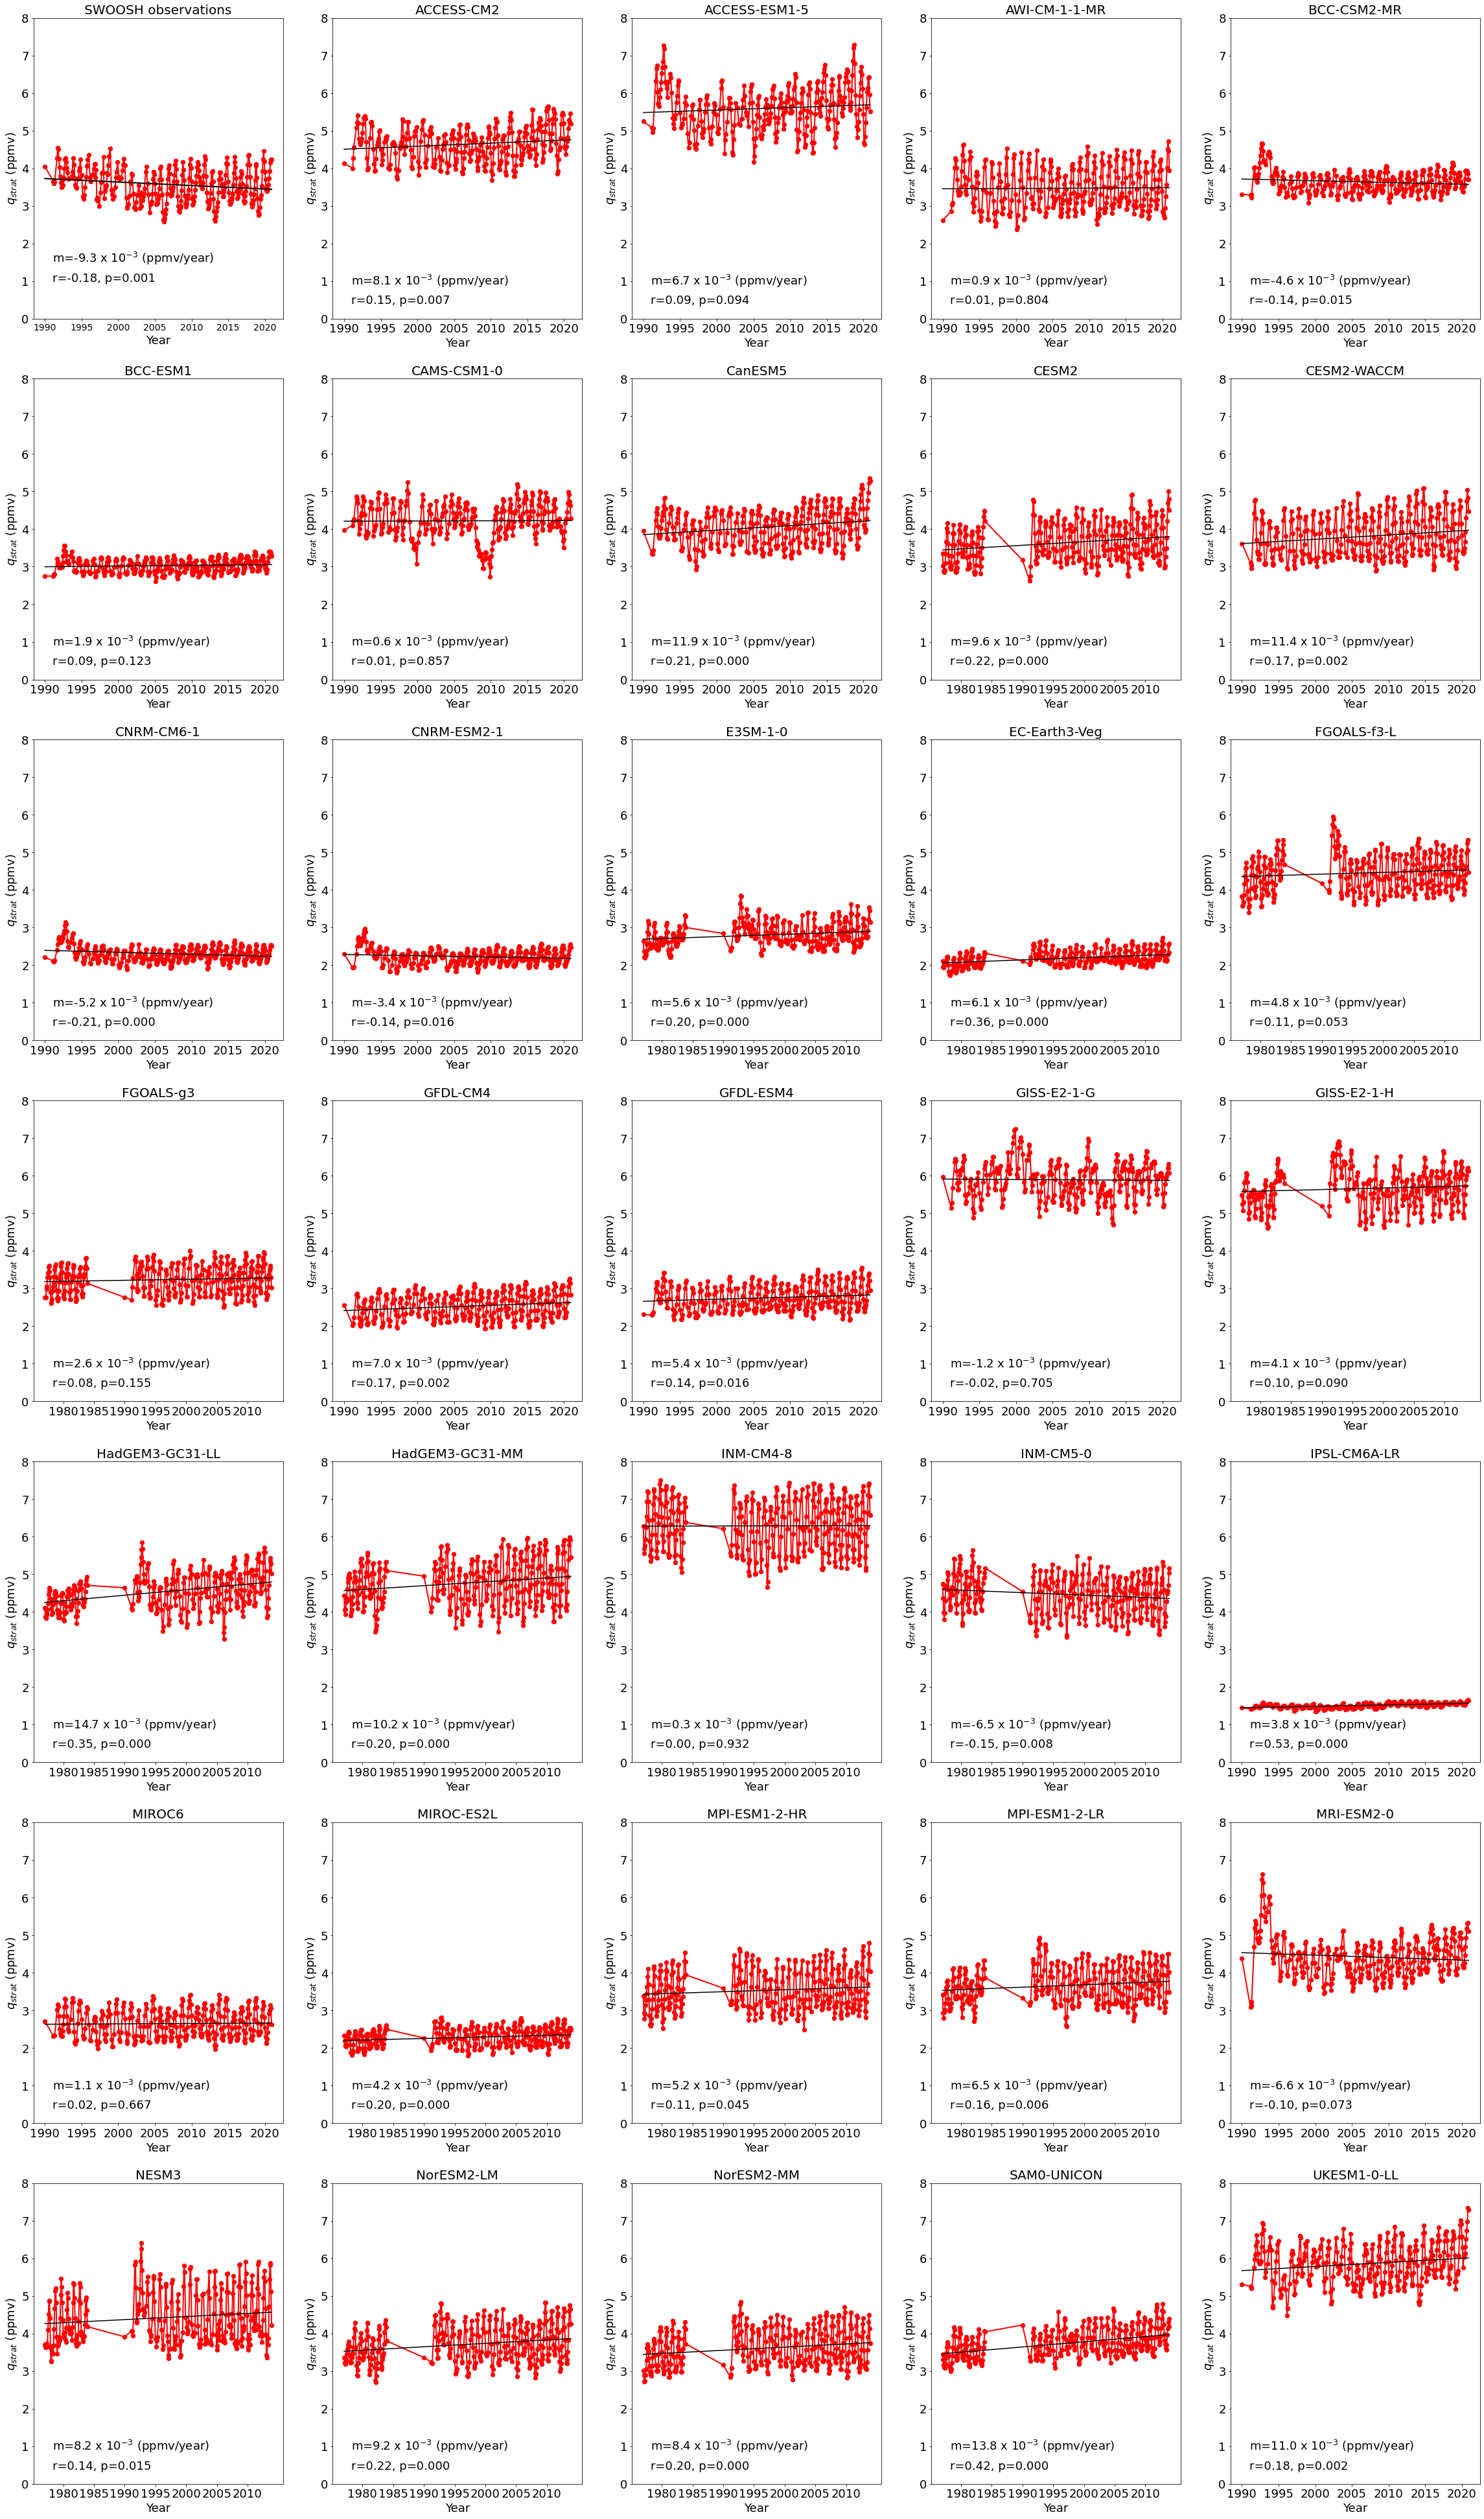

In [10]:
#### then plot CMIP6 models
import matplotlib.patches
matplotlib.rcParams.update({'font.size': 14})
nrows=7
ncols=5
nr_models = len(model_list_cmip6)

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(40,70))
axs=axs.flatten()
nr_samples = len(swoosh_tropics_Will_mean[non_nan_indices.flatten()])
months = np.array(non_nan_indices.flatten())
reg1 = stats.linregress(months,swoosh_tropics_Will_mean[non_nan_indices.flatten()])

axs[0].plot(months,swoosh_tropics_Will_mean[non_nan_indices.flatten()],color='r',linewidth=2)
axs[0].scatter(months,swoosh_tropics_Will_mean[non_nan_indices.flatten()],color='r',s=40)
axs[0].plot(months,reg1.intercept+reg1.slope*months,color='k',linewidth=2)
axs[0].set_title('SWOOSH observations',size=20)
axs[0].set_xlabel('Year',size=18)
axs[0].set_ylabel('$q_{strat}$ (ppmv)',size=18)
axs[0].text(0.075,0.2,'m='+str("{:.1f}".format(round(reg1.slope*1e3*12,1)))+' x $10^{-3}$ (ppmv/year)',horizontalalignment='left', verticalalignment='center', transform=axs[0].transAxes,size=18)
axs[0].text(0.075,0.135,'r='+str("{:.2f}".format(round(reg1.rvalue,2)))+\
            ', p='+str("{:.3f}".format(round(reg1.pvalue,3))),horizontalalignment='left', verticalalignment='center', transform=axs[0].transAxes,size=18)
axs[0].set_ylim(0,8.0)
axs[0].set_xticks([72,132,192,252,312,372,432])
axs[0].set_xticklabels(['1990','1995','2000','2005','2010','2015','2020'])
axs[0].set_yticks([0,1,2,3,4,5,6,7,8])
axs[0].set_yticklabels(['0','1','2','3','4','5','6','7','8'],size=18)
### now add the equivalent CMIP model data
nr_obs=1
for modeli in range(0,nr_models):
    Y_raw_hist = netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list_cmip6[modeli]+'*historical*.nc')[0])['hus'][:nt_train_end,level_selected,0,0]*1e6/0.6213
    print(model_list_cmip6[modeli],netCDF4.Dataset(glob.glob('./data/cmip/hus/hus*'+model_list_cmip6[modeli]+'*historical*.nc')[0])['plev'][level_selected])
    if model_list_cmip6[modeli] in model_list_cmip6_1977:
### first 192 months can be considered fully covered for the model, similar to the last 192 months in SWOOSH. Critical is the masking from 72+192 onwards; covering Pinatubo
        shifted_months = months[:-84]+84
        months_modeli = np.concatenate([np.arange(0,84),shifted_months])
#         print(months_modeli.shape)
    else:
        months_modeli = months    
    axs[modeli+nr_obs].plot(months_modeli,Y_raw_hist[months_modeli],color='r',linewidth=2)
    axs[modeli+nr_obs].scatter(months_modeli,Y_raw_hist[months_modeli],color='r',s=40)
    reg = stats.linregress(months_modeli,Y_raw_hist[months_modeli])
    axs[modeli+nr_obs].plot(months_modeli,reg.intercept+reg.slope*months_modeli,color='k')
    axs[modeli+nr_obs].set_xlabel('Year',size=18)
    axs[modeli+nr_obs].set_ylabel('$q_{strat}$ (ppmv)',size=18)
    axs[modeli+nr_obs].text(0.075,0.125,'m='+str("{:.1f}".format(round(reg.slope*1e3*12,1)))+' x $10^{-3}$ (ppmv/year)',horizontalalignment='left', verticalalignment='center', 
                            transform=axs[modeli+nr_obs].transAxes,size=18)
    axs[modeli+nr_obs].text(0.075,0.06,'r='+str("{:.2f}".format(round(reg.rvalue,2)))+\
            ', p='+str("{:.3f}".format(round(reg.pvalue,3))),horizontalalignment='left', verticalalignment='center', transform=axs[modeli+nr_obs].transAxes,size=18)
    axs[modeli+nr_obs].set_title(model_list_cmip6_labels[modeli],size=20)
    axs[modeli+nr_obs].set_ylim(0,8.0)
    if model_list_cmip6[modeli] in model_list_cmip6_1977:
        axs[modeli+nr_obs].set_xticks([36,96,156,216,276,336,396])
        axs[modeli+nr_obs].set_xticklabels(['1980','1985','1990','1995','2000','2005','2010'],size=18)
    else:
        axs[modeli+nr_obs].set_xticks([72,132,192,252,312,372,432])
        axs[modeli+nr_obs].set_xticklabels(['1990','1995','2000','2005','2010','2015','2020'],size=18)
    axs[modeli+nr_obs].set_yticks([0,1,2,3,4,5,6,7,8])
    axs[modeli+nr_obs].set_yticklabels(['0','1','2','3','4','5','6','7','8'],size=18)
plt.show()